In [115]:
#!conda install -y -c anaconda pillow
#!conda install -y -c conda-forge ipywidgets

In [133]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [147]:
import warnings
warnings.simplefilter('ignore')

In [148]:
%matplotlib inline
plt.style.use('classic')

In [149]:
def load_image (image_path):
    img = Image.open(image_path)
    imgmat_array = np.array(list(img.getdata()), float)
    imgmat_array = imgmat_array / 255
    imgmat = imgmat_array
    imgmat.shape = (img.size[1], img.size[0] , 3 )
    return (imgmat , imgmat_array)

def display_image (imgmat):
    plt.figure(figsize=(9, 6))
    plt.imshow(imgmat)
    plt.show()

In [150]:
imgmat , imgmat_array = load_image('images/parrot.jpg')

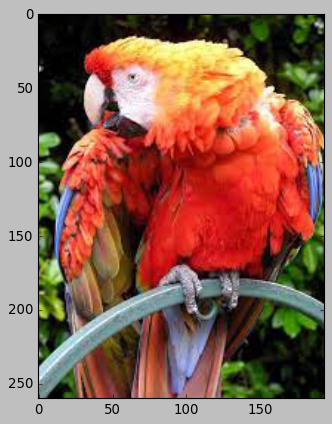

In [151]:
display_image (imgmat)

In [152]:
def generate_yiq_from_rgb(imgmat_array):
    
    yiq_from_rgb = np.array([[0.299,      0.587,        0.114],
                        [0.59590059, -0.27455667, -0.32134392],
                        [0.21153661, -0.52273617, 0.31119955]])
    result =  np.dot(imgmat_array, yiq_from_rgb.T.copy())
    return result

def generate_rgb_from_yiq(imgmat_array , alpha , beta):
    yiq_from_rgb = np.array([[1 * alpha, 0.9663 * beta, 0.6210 * beta],
                             [1 * alpha , -0.2721 * beta, -0.6474 * beta],
                             [1 * alpha, -1.1070 * beta, 1.7046* beta] ])
    result =  np.dot(imgmat_array, yiq_from_rgb.T.copy())
    return result

In [153]:
result = generate_yiq_from_rgb(imgmat_array)

In [154]:
result_1 = generate_rgb_from_yiq(result , 1.1 ,1)

In [155]:
imgmat.shape

(260, 194, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


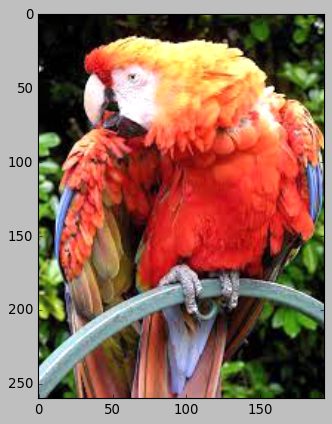

In [156]:
result_1.shape = imgmat.shape
display_image (result_1)

In [157]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
#https://stackoverflow.com/questions/36351109/ipython-notebook-ipywidgets-does-not-show

In [158]:
w = widgets.IntSlider(value = 100, min = 1 , max = 200, step = 1)
display(w)

IntSlider(value=100, max=200, min=1)

In [159]:
def modify_image(lumenance, chrome , imgmat_array ,imgmat ):
    
    result = generate_yiq_from_rgb(imgmat_array)
    result_1 = generate_rgb_from_yiq(result , lumenance ,chrome)
    result_1.shape = imgmat.shape
    display_image (result_1)
    
def modify_image_2(lumenance, chrome):
    modify_image( lumenance /100, chrome / 100 ,imgmat_array = imgmat_array , imgmat  = imgmat)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


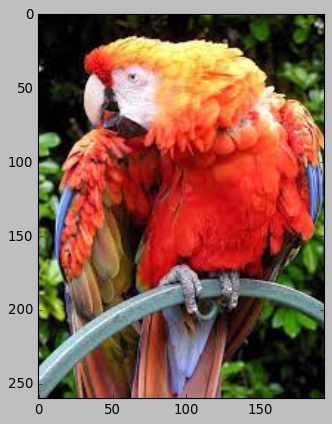

In [160]:
modify_image (1,1, imgmat_array ,imgmat)

In [161]:
interact(modify_image_2, lumenance=widgets.IntSlider(min=1, max=200, step=1, value=100) , chrome =widgets.IntSlider(min=1, max=200, step=1, value=100) );

interactive(children=(IntSlider(value=100, description='lumenance', max=200, min=1), IntSlider(value=100, desc…

In [162]:
def h(p, q):
    return (p, q)

In [163]:
interact(h, p=5, q=fixed(20));

interactive(children=(IntSlider(value=5, description='p', max=15, min=-5), Output()), _dom_classes=('widget-in…

In [164]:
interact(h, p=widgets.IntSlider(min=-10, max=30, step=1, value=10));

ValueError: cannot find widget or abbreviation for argument: 'q'